<a href="https://colab.research.google.com/github/Jesicaprmta/Visualisasi-Data/blob/main/UTS_PDAB_2304220039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.

## 1a.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")  # Pastikan file ada di direktori kerja

# Tampilkan informasi awal
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
total_penumpang = len(df)
print("a. Jumlah total penumpang:", total_penumpang)

a. Jumlah total penumpang: 891


## 1b.


b. Jumlah penumpang yang selamat dan tidak selamat:
 Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


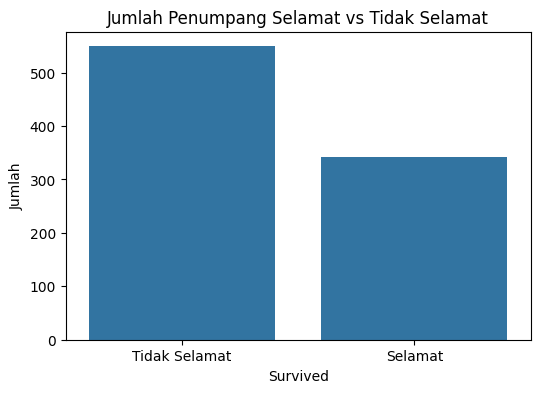

In [ ]:
survival_counts = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
print("\nb. Jumlah penumpang yang selamat dan tidak selamat:\n", survival_counts)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title("Jumlah Penumpang Selamat vs Tidak Selamat")
plt.ylabel("Jumlah")
plt.show()

## 1c.

In [ ]:
rata_rata_umur = df['Age'].mean()
termuda = df[df['Age'] == df['Age'].min()][['Name', 'Age']]
tertua = df[df['Age'] == df['Age'].max()][['Name', 'Age']]

print("\nc. Rata-rata umur penumpang:", round(rata_rata_umur, 2))
print("   Penumpang termuda:\n", termuda)
print("   Penumpang tertua:\n", tertua)


c. Rata-rata umur penumpang: 29.7
   Penumpang termuda:
                                 Name   Age
803  Thomas, Master. Assad Alexander  0.42
   Penumpang tertua:
                                      Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


## 1d.


d. Jumlah penumpang berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64


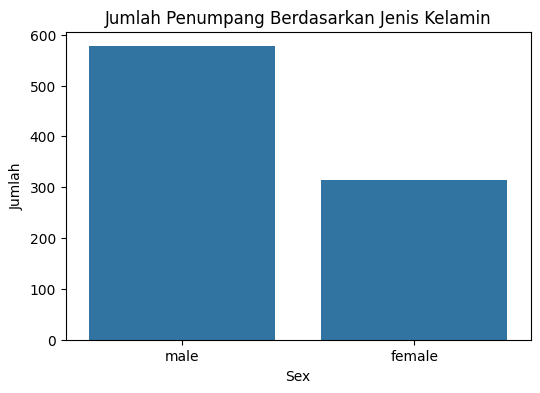

In [ ]:
jumlah_gender = df['Sex'].value_counts()
print("\nd. Jumlah penumpang berdasarkan jenis kelamin:\n", jumlah_gender)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=jumlah_gender.index, y=jumlah_gender.values)
plt.title("Jumlah Penumpang Berdasarkan Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

## 1e.


e. Jumlah penumpang berdasarkan kelas:
 Pclass
1    216
2    184
3    491
Name: count, dtype: int64
   Persentase penumpang di kelas 1: 24.24%


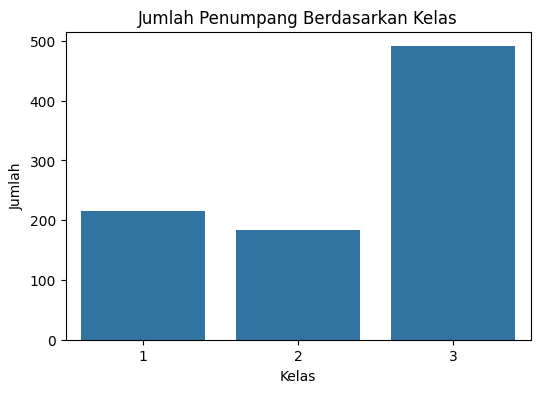

In [ ]:
jumlah_kelas = df['Pclass'].value_counts().sort_index()
persentase_kelas_1 = (jumlah_kelas[1] / total_penumpang) * 100

print("\ne. Jumlah penumpang berdasarkan kelas:\n", jumlah_kelas)
print("   Persentase penumpang di kelas 1: {:.2f}%".format(persentase_kelas_1))

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=jumlah_kelas.index.astype(str), y=jumlah_kelas.values)
plt.title("Jumlah Penumpang Berdasarkan Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# 2.

## 2a.

In [ ]:
# Cek missing value
missing_values = df.isnull().sum()
print("a. Jumlah missing value per kolom:\n", missing_values)

a. Jumlah missing value per kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ya, terdapat missing value pada data Titanic. Kolom Age memiliki 177 data yang hilang, Cabin memiliki 687 missing value, dan Embarked sebanyak 2. Sementara kolom lainnya tidak memiliki missing value.

## 2b.

In [ ]:
# Mengisi missing value pada kolom 'Age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Mengisi missing value pada kolom 'Embarked' dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Menghapus kolom 'Cabin' karena terlalu banyak kosong
df.drop(columns='Cabin', inplace=True)

# Periksa kembali missing value
print("\nSetelah penanganan, missing value:\n", df.isnull().sum())



Setelah penanganan, missing value:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-8-98d65ffcff4a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-98d65ffcff4a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Iya, kalau ada data yang kosong, saya akan menangani sesuai jenis kolomnya. Misalnya, kolom Age yang kosong bisa saya isi dengan rata-rata umur penumpang. Kolom Embarked cuma ada 2 yang kosong, jadi bisa diisi pakai data yang paling sering muncul. Tapi untuk Cabin, karena yang kosong lebih dari setengah, lebih baik kolom itu dihapus saja karena terlalu banyak datanya yang hilang.


## 2c.

In [ ]:
# Hitung IQR untuk kolom 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Cari data yang merupakan outlier
outliers = df[(df['Age'] < batas_bawah) | (df['Age'] > batas_atas)]

# Tampilkan informasi
print("Rentang normal umur penumpang:", round(batas_bawah, 2), "-", round(batas_atas, 2))
print("Jumlah outlier umur:", outliers.shape[0])
print("Contoh data outlier:\n", outliers[['Name', 'Age']].head())


Rentang normal umur penumpang: 2.5 - 54.5
Jumlah outlier umur: 66
Contoh data outlier:
                                 Name   Age
7     Palsson, Master. Gosta Leonard   2.0
11          Bonnell, Miss. Elizabeth  58.0
15  Hewlett, Mrs. (Mary D Kingcome)   55.0
16              Rice, Master. Eugene   2.0
33             Wheadon, Mr. Edward H  66.0


Dari hasil tersebut ada outlier, umur penumpang yang dianggap normal ada di rentang 2.5 sampai 54.5 tahun. Tapi ternyata ada 66 orang yang usianya di luar rentang itu, jadi mereka termasuk outlier. Contohnya ada yang umurnya 2 tahun, ada juga yang 66 tahun.

Outlier adalah data yang nilainya jauh berbeda dari mayoritas data lainnya. Nilai ini bisa muncul karena kesalahan, kondisi khusus, atau variasi ekstrem, dan sering kali memengaruhi hasil analisis jika tidak ditangani.










## 2d.

Menurut saya, outlier pada data Titanic sebenarnya bisa diatasi, tapi tidak harus dihapus karena sebagian besar masih masuk akal. Contohnya, penumpang yang berusia 2 tahun atau 66 tahun memang benar-benar ada, jadi bukan kesalahan data. Kalau diperlukan, outlier bisa ditangani dengan teknik seperti transformasi log atau scaling supaya distribusinya lebih seimbang. Tapi kalau model yang digunakan tidak sensitif terhadap outlier, data bisa dibiarkan tetap seperti aslinya

## 2e.

menurut saya outliernya tidak perlu diatasi, tapi saya ingin mencoba coba jika dilakukan scalling terhadap data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Age', 'Fare']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_scaled[cols_to_scale].describe()

,Age,Fare
count,891.000000,891.000000
mean,0.363679,0.062858
std,0.163605,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


# 3.

## 3a.

Data perlu dibagi menjadi data training dan testing agar model bisa dilatih terlebih dahulu, lalu diuji kemampuannya memprediksi data baru. Data training digunakan untuk membangun model, sedangkan data testing digunakan untuk mengukur seberapa baik model tersebut bekerja pada data yang belum pernah dilihat sebelumnya. Ini penting supaya hasil prediksi lebih akurat dan tidak hanya bagus di data latihan saja.



## 3b.

Umumnya data dibagi dengan proporsi 80% untuk training dan 20% untuk testing. Proporsi ini cukup seimbang karena model punya cukup banyak data untuk belajar, tapi masih menyisakan cukup data untuk evaluasi. Pembagian ini sering digunakan karena memberikan hasil yang stabil dan tidak membuat model overfitting atau underfitting.

# 3c.

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas suatu data masuk ke dalam kelas tertentu, misalnya selamat (1) atau tidak selamat (0). Model ini bekerja dengan menghitung nilai probabilitas menggunakan fungsi logistik (sigmoid), lalu mengklasifikasikannya berdasarkan ambang batas tertentu (biasanya 0.5).

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       105
           1       0.67      0.72      0.69        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



Decision Tree adalah model yang bekerja seperti pohon keputusan, di mana setiap cabang merepresentasikan kondisi dari fitur tertentu (seperti umur, kelas, dll). Model ini memecah data berdasarkan fitur yang paling memisahkan kelas, hingga mencapai keputusan akhir berupa prediksi kelas.

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_forest))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



Random Forest adalah model ensemble yang terdiri dari banyak Decision Tree. Setiap pohon dilatih dengan subset data dan fitur yang berbeda. Hasil akhir diperoleh dari voting mayoritas dari semua pohon. Model ini lebih akurat dan tahan terhadap overfitting dibanding satu pohon saja.

# 3d.

## Logistic Regression

Berdasarkan hasil evaluasi terhadap model Logistic Regression, diperoleh akurasi sebesar 80%, yang berarti model mampu memprediksi dengan benar 80% dari total data uji. Untuk penumpang yang selamat (kelas 1), nilai precision-nya 0.78, artinya dari semua penumpang yang diprediksi selamat, 78% benar-benar selamat. Nilai recall-nya 0.73, menunjukkan bahwa model berhasil mengenali 73% dari seluruh penumpang yang benar-benar selamat. Sedangkan f1-score-nya 0.76, yang merupakan gabungan dari precision dan recall, menandakan bahwa model cukup seimbang dan stabil dalam melakukan prediksi. Secara keseluruhan, Logistic Regression sudah menunjukkan kinerja yang cukup baik untuk memprediksi siapa yang selamat dalam data Titanic.

## Decision Tree

Berdasarkan hasil evaluasi terhadap model Decision Tree, diperoleh akurasi sebesar 74%, yang berarti model mampu memprediksi dengan benar 74% dari data uji. Untuk penumpang yang selamat (kelas 1), precision-nya sebesar 0.67, artinya dari seluruh penumpang yang diprediksi selamat, hanya 67% yang benar-benar selamat. Sementara nilai recall-nya 0.72, menunjukkan bahwa model mampu menangkap sekitar 72% dari semua penumpang yang benar-benar selamat. F1-score untuk kelas selamat adalah 0.69, yang menunjukkan bahwa performa model masih seimbang, meskipun sedikit lebih rendah dibanding Logistic Regression.

## Random Forest

Berdasarkan hasil evaluasi terhadap model Random Forest, diperoleh akurasi sebesar 79%, yang berarti model dapat memprediksi data uji dengan benar sebanyak 79%. Untuk penumpang yang selamat (kelas 1), nilai precision sebesar 0.75, yang artinya dari semua penumpang yang diprediksi selamat, 75% di antaranya benar-benar selamat. Nilai recall-nya sebesar 0.74, menunjukkan bahwa model berhasil menangkap sekitar 74% dari seluruh penumpang yang benar-benar selamat. Sementara itu, f1-score-nya sebesar 0.75, menandakan bahwa model memiliki keseimbangan yang cukup baik antara precision dan recall. Secara keseluruhan, Random Forest menunjukkan performa yang stabil dan hampir setara dengan Logistic Regression, meskipun akurasinya sedikit lebih rendah.

# 3e.

Dari ketiga model yang diuji, Logistic Regression memberi hasil terbaik dengan akurasi 80% dan f1-score 0.76. Model ini lebih seimbang dan stabil dalam memprediksi penumpang yang selamat. Random Forest juga bagus, tapi sedikit di bawah Logistic Regression. Decision Tree paling rendah akurasinya. Logistic Regression cocok karena data Titanic cukup sederhana dan pola hubungan antar fitur cukup jelas, jadi model ini bisa menangkapnya dengan baik tanpa overfitting.